In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

import os
print(os.listdir("../input"))

import zipfile

with zipfile.ZipFile("/kaggle/input/dogs-vs-cats/train.zip","r") as z:
    z.extractall(".")

with zipfile.ZipFile("/kaggle/input/dogs-vs-cats/test1.zip","r") as z:
    z.extractall(".")

['dogs-vs-cats']


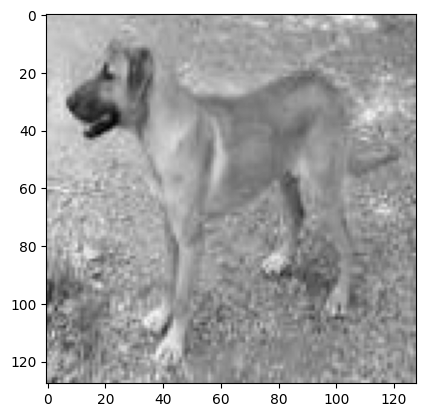

In [ ]:
path = "/kaggle/working/train"
for p in os.listdir(path):
    category = p.split(".")[0]
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(128, 128))
    plt.imshow(new_img_array,cmap="gray")
    break

In [ ]:
#Defined the image width, height, and size for data
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        2

In [ ]:
X = []
y = []
convert = lambda category : int(category == 'cat')
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(128, 128))
        X.append(new_img_array)
        y.append(category)

In [ ]:
create_test_data(path)
X = np.array(X).reshape(-1, 128,128,1)
y = np.array(y)

In [ ]:
X = X/255.0

In [ ]:
#fit my model with training data
model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


2024-02-07 15:50:01.050157: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


625/625 [==============================] - 19s 22ms/step - loss: 0.6909 - accuracy: 0.6572 - val_loss: 1.0275 - val_accuracy: 0.6028
Epoch 2/50
625/625 [==============================] - 13s 21ms/step - loss: 0.4975 - accuracy: 0.7616 - val_loss: 0.6029 - val_accuracy: 0.7452
Epoch 3/50
625/625 [==============================] - 13s 21ms/step - loss: 0.4237 - accuracy: 0.8016 - val_loss: 0.4336 - val_accuracy: 0.8186
Epoch 4/50
625/625 [==============================] - 13s 21ms/step - loss: 0.3754 - accuracy: 0.8323 - val_loss: 0.5139 - val_accuracy: 0.7852
Epoch 5/50
625/625 [==============================] - 13s 21ms/step - loss: 0.3407 - accuracy: 0.8524 - val_loss: 0.5157 - val_accuracy: 0.7880
Epoch 6/50
625/625 [==============================] - 13s 21ms/step - loss: 0.3137 - accuracy: 0.8629 - val_loss: 1.0594 - val_accuracy: 0.6486
Epoch 7/50
625/625 [==============================] - 13s 21ms/step - loss: 0.2635 - accuracy: 0.8913 - val_loss: 0.6188 - val_accuracy: 0.7886
Epo

In [ ]:
path = "/kaggle/working/test1"
X_test = []
id_line = []
def create_test1_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(128, 128))
        X_test.append(new_img_array)
create_test1_data(path)
X_test = np.array(X_test).reshape(-1,128,128,1)
X_test = X_test/255

In [ ]:
predictions = model.predict(X_test)

391/391 [==============================] - 2s 4ms/step


In [ ]:
predicted_val = [int(round(p[0])) for p in predictions]

In [ ]:
submission_df = pd.DataFrame({'id':id_line, 'label':predicted_val})

In [ ]:
submission_df

,id,label
0,6436,0
1,7321,0
2,7381,1
3,11430,0
4,10430,1
...,...,...
12495,5730,0
12496,5381,0
12497,3210,0
12498,4398,0


In [ ]:
submission_df["label"] = submission_df["label"].replace({0: 'dog', 1: 'cat'})

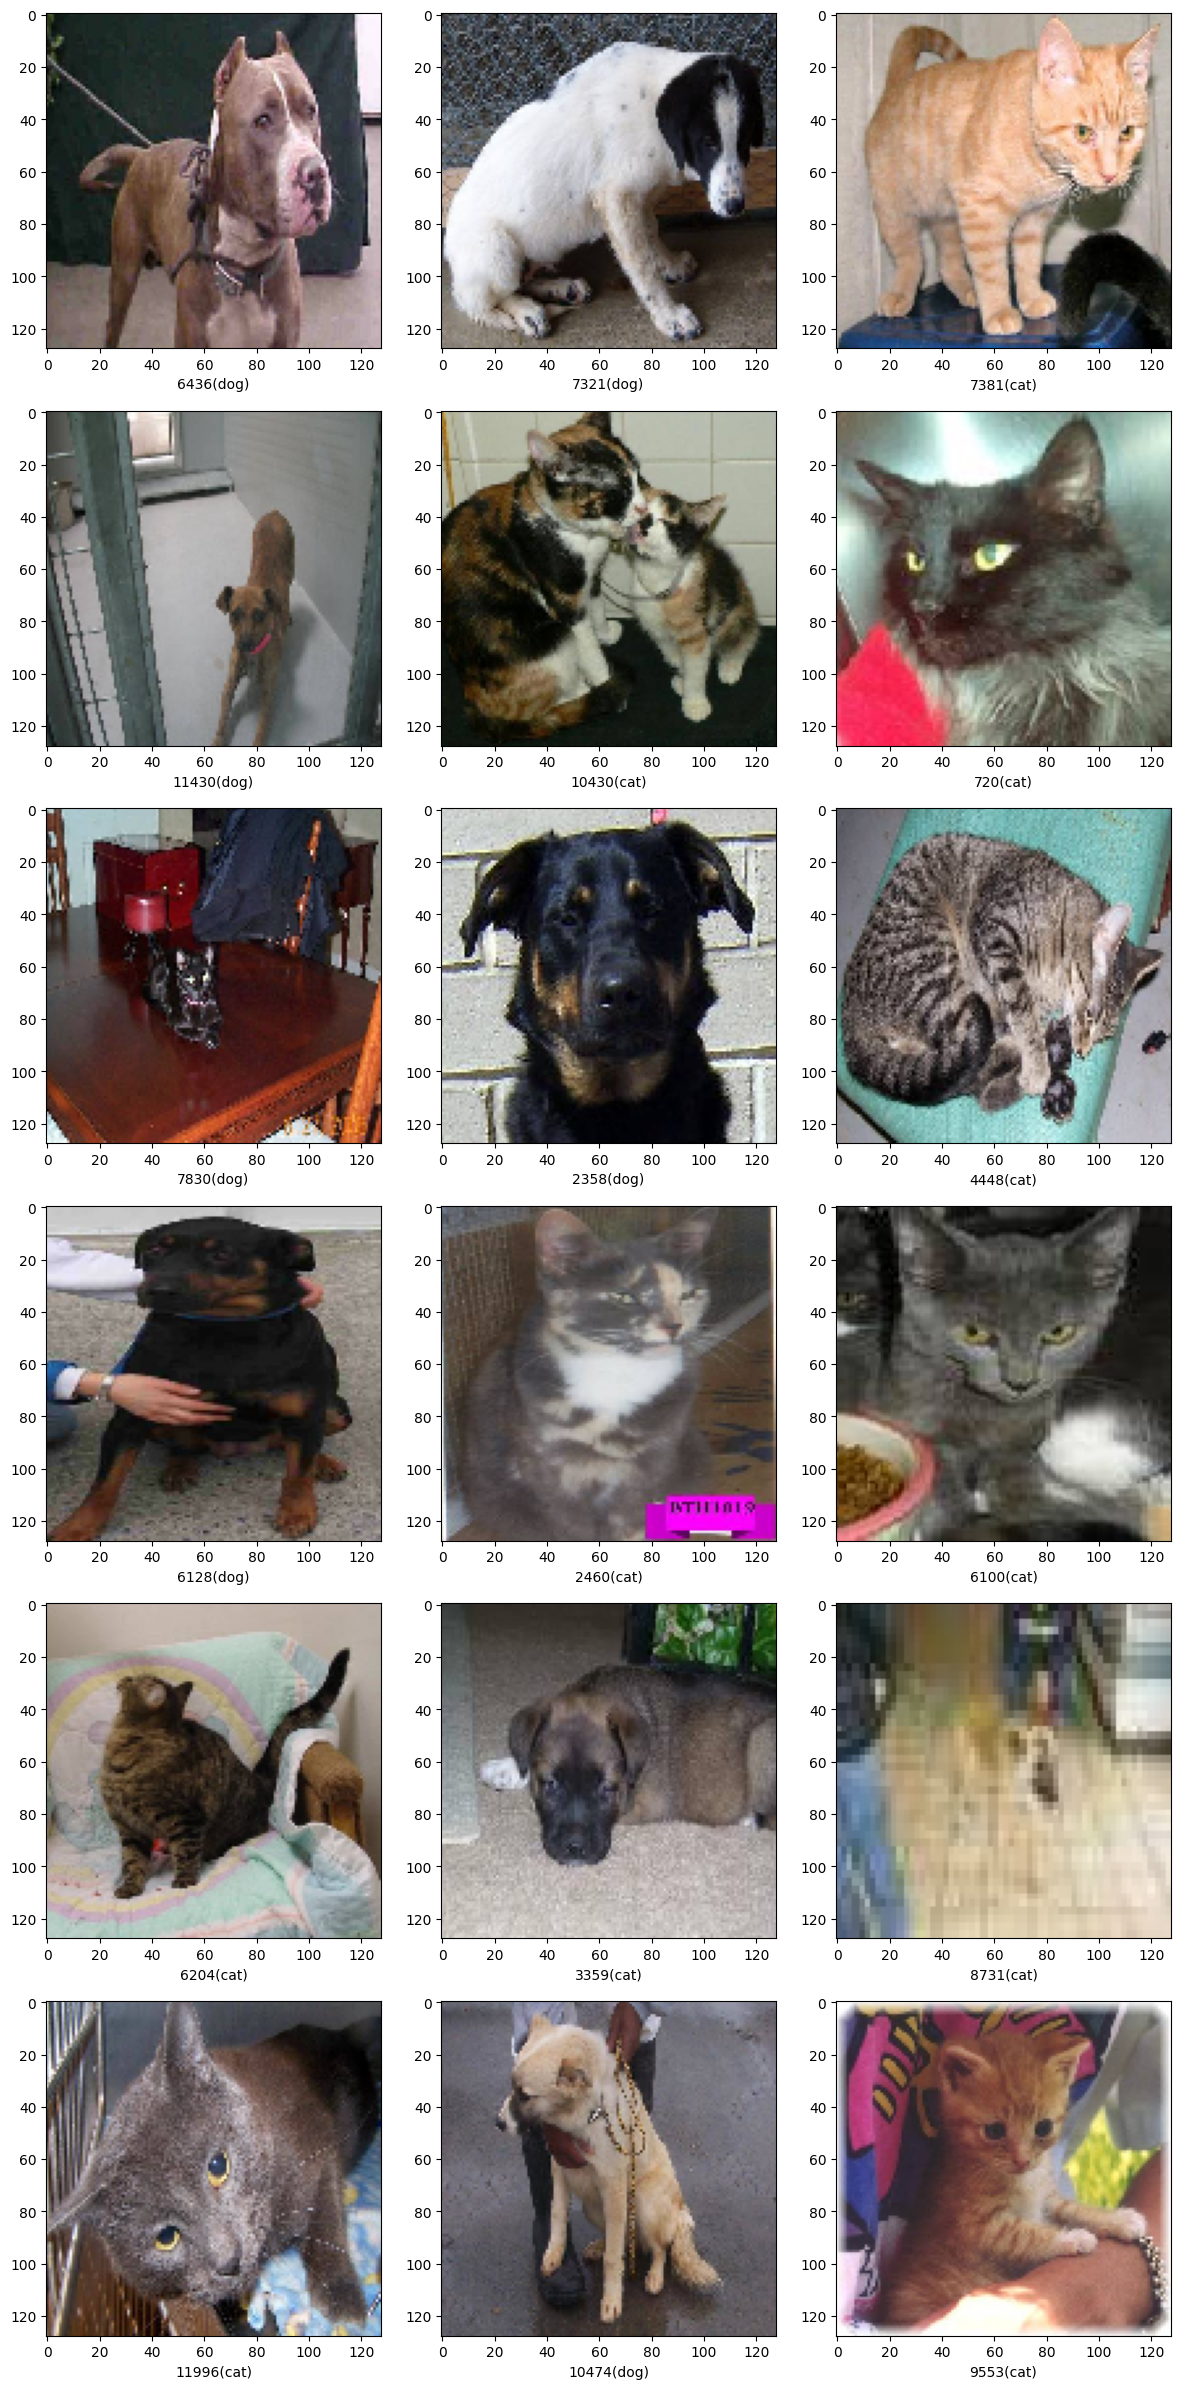

In [ ]:
from keras.preprocessing.image import load_img
sample_test = submission_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['id']
    category = row['label']
    img = load_img("/kaggle/working/test1/"+filename+".jpg", target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [ ]:
pip install watermark

  Obtaining dependency information for watermark from https://files.pythonhosted.org/packages/67/ee/32fec350c20ff060064d058c37df53dd1fad74dfea9532faf2868b0512b5/watermark-2.4.3-py2.py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%load_ext watermark
%watermark -a "Sri Hari Sai P 21BAI1143" -u -d -v -m

Author: Sri Hari Sai P 21BAI1143

Last updated: 2024-02-07

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 8.14.0

Compiler    : GCC 12.3.0
OS          : Linux
Release     : 5.15.133+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

